<a href="https://colab.research.google.com/github/vsilchev/hse-intro-ml/blob/master/Seminar_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install shap

In [0]:
import xgboost as xgb
import shap

In [0]:
X,y = shap.datasets.boston()

### The Boston Housing Dataset

A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass.

There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town 
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
1. INDUS - proportion of non-retail business acres per town.
1. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
1. NOX - nitric oxides concentration (parts per 10 million)
1. RM - average number of rooms per dwelling
1. AGE - proportion of owner-occupied units built prior to 1940
1. DIS - weighted distances to five Boston employment centres
1. RAD - index of accessibility to radial highways
1. TAX - full-value property-tax rate per \$10,000
1. PTRATIO - pupil-teacher ratio by town
1. B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
1. LSTAT - % lower status of the population

In [3]:
print(X.shape)
X.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [0]:
model = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(X, label=y), 100) # 100 - Number of boosting iterations

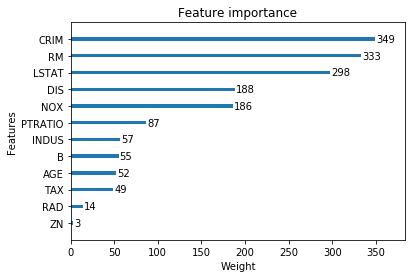

In [6]:
xgb.plot_importance(model, grid=False, importance_type='weight', xlabel='Weight');

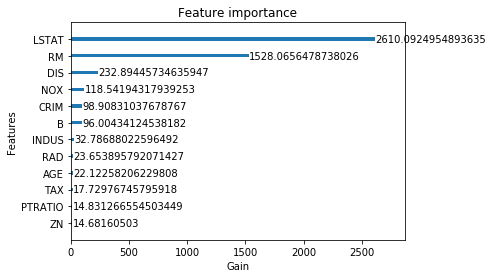

In [7]:
xgb.plot_importance(model, grid=False, importance_type='gain', xlabel='Gain');

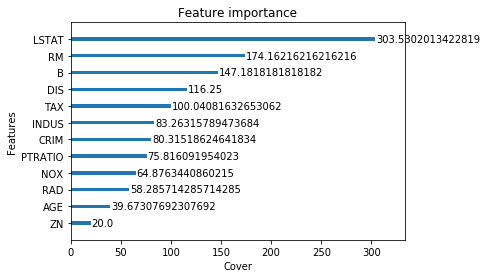

In [8]:
xgb.plot_importance(model, grid=False, importance_type='cover', xlabel='Cover');

In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [10]:
# visualize the first prediction's explanation
shap.initjs()
case_i = 1
shap.force_plot(explainer.expected_value, shap_values[case_i,:], X.iloc[case_i,:]) # use matplotlib=True to avoid Javascript

In [11]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

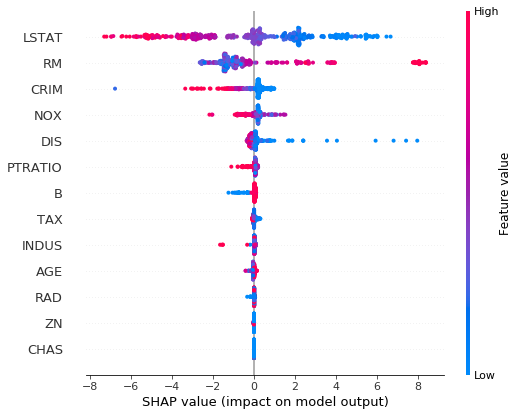

In [12]:
# summarize the effects of all the features
shap.initjs()
shap.summary_plot(shap_values, X)

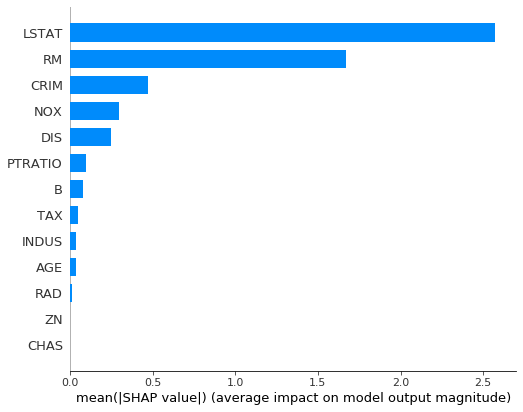

In [13]:
shap.summary_plot(shap_values, X, plot_type="bar")